In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
data = pd.read_hdf('/home/jls/public_html/data/gaia_spectro.hdf5')

In [156]:
elep = pd.read_hdf('/data/jls/GaiaDR2/spectro/orbital_parameters.hdf5')
alap = pd.read_hdf('/data/jls/GaiaDR2/spectro/input_photometry_and_spectroscopy.hdf5')

In [3]:
import aa_py
pot = aa_py.GalPot('../../../code/Torus/pot/PJM16_best.Tpot')

In [4]:
init_condition = lambda ii:np.array([data['R'].values[ii],0.,data['z'].values[ii],\
               data['vR'].values[ii],data['vphi'].values[ii],data['vz'].values[ii]])

In [5]:
init_conditions = np.array([data['R'].values.T,np.zeros_like(data['R'].values).T,data['z'].values.T,\
               data['vR'].values.T,data['vphi'].values.T,data['vz'].values.T]).T
print np.shape(init_conditions)

(4906746, 6)


In [328]:
print np.shape(init_conditions)

(4906746, 6)


In [87]:
def integrate(x,totalTfrac=100.,frac=1,dt=None,pot=pot,back=False):
    if np.any(np.isnan(x)) or np.any(np.isinf(x)):
        return np.nan*np.zeros((1,6)),np.nan*np.ones(1)
    x = x.copy()
    if back:
        x[3:]*=-1.
    Orb = aa_py.Orbit(pot,1e-10)
    if(dt==None):
        dT = frac*pot.torb(x)
    else:
        dT=dt
    t = totalTfrac*dT/frac
    if np.isnan(t) or np.isinf(t):
        # Unbound
        return np.nan*np.zeros((1,6)),np.nan*np.ones(1)
    r = np.zeros((int(t/dT)+1,6))
    r[0]=x
    i,T=1,0
    while(T<t):
        if i==len(r):
            break
        r[i]=Orb.integrate(r[i-1],dT,dT,False)
        T+=dT
        i+=1
    return r,T

In [7]:
def stats(XX):
    if np.any(np.isnan(XX)) or np.any(np.isinf(XX)):
        return np.nan*np.ones(7)
    R = np.sqrt(np.sum(XX[:,:3]**2,axis=1))
    polR = np.sqrt(np.sum(XX[:,:2]**2,axis=1))
    return np.array([np.min(R),np.max(R),(np.max(R)-np.min(R))/(np.max(R)+np.min(R)),\
           np.min(polR),np.max(polR),(np.max(polR)-np.min(polR))/(np.max(polR)+np.min(polR)),np.max(np.abs(XX[:,2]))])

(0.0, 1000.0)

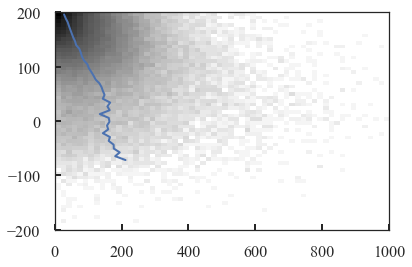

In [55]:
from plotting_general import running_median
plt.hist2d(data['Jz'][(data['Z']<-0.4)&(data['Z']>-0.6)&(np.abs(data['vphi'])<200.)],
        data['vphi'][(data['Z']<-0.4)&(data['Z']>-0.6)&(np.abs(data['vphi'])<200.)],
          range=[[0.,1000.],[-200.,200.]],norm=LogNorm(),bins=60)
r = running_median(
        data['vphi'][(data['Z']<-0.4)&(data['Z']>-0.6)&(np.abs(data['vphi'])<200.)],
data['Jz'][(data['Z']<-0.4)&(data['Z']>-0.6)&(np.abs(data['vphi'])<200.)],nbins=40)
plt.plot(r[1],r[0])
plt.xlim(0.,1000.)

Text(0,0.5,'R')

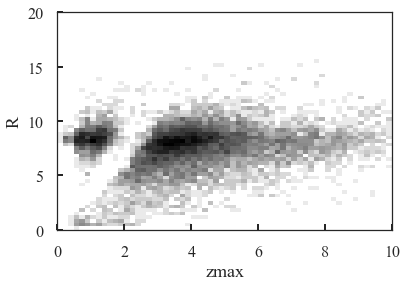

In [70]:
plt.hist2d(elep['zmax'][(data['Z']<-0.4)&(data['Z']>-0.6)&(np.abs(data['vphi'])<80.)],
           data['R'][(data['Z']<-0.4)&(data['Z']>-0.6)&(np.abs(data['vphi'])<80.)],
          range=[[0.,10.],[0.,20.]],norm=LogNorm(),bins=60);
plt.xlabel('zmax')
plt.ylabel('R')

Text(0,0.5,'vphi')

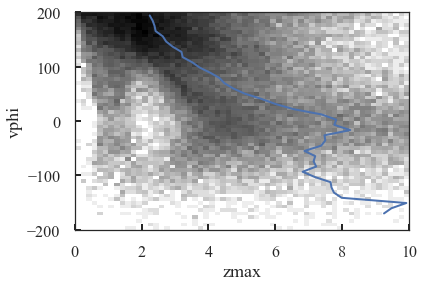

In [98]:
from plotting_general import running_median
plt.hist2d(elep['zmax'][(data['Z']<-0.8)&(data['Z']>-1.2)&(np.abs(data['vphi'])<200.)],
        data['vphi'][(data['Z']<-0.8)&(data['Z']>-1.2)&(np.abs(data['vphi'])<200.)],
          range=[[0.,10.],[-200.,200.]],norm=LogNorm(),bins=60)
r = running_median(
        data['vphi'][(data['Z']<-0.8)&(data['Z']>-1.2)&(np.abs(data['vphi'])<200.)],
elep['zmax'][(data['Z']<-0.8)&(data['Z']>-1.2)&(np.abs(data['vphi'])<200.)],nbins=40)
plt.plot(r[1],r[0])
plt.xlim(0.,10.)
plt.xlabel('zmax')
plt.ylabel('vphi')

Text(0,0.5,'vphi')

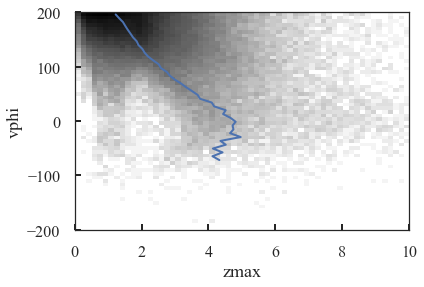

In [65]:
from plotting_general import running_median
plt.hist2d(elep['zmax'][(data['Z']<-0.4)&(data['Z']>-0.6)&(np.abs(data['vphi'])<200.)],
        data['vphi'][(data['Z']<-0.4)&(data['Z']>-0.6)&(np.abs(data['vphi'])<200.)],
          range=[[0.,10.],[-200.,200.]],norm=LogNorm(),bins=60)
r = running_median(
        data['vphi'][(data['Z']<-0.4)&(data['Z']>-0.6)&(np.abs(data['vphi'])<200.)],
elep['zmax'][(data['Z']<-0.4)&(data['Z']>-0.6)&(np.abs(data['vphi'])<200.)],nbins=40)
plt.plot(r[1],r[0])
plt.xlim(0.,10.)
plt.xlabel('zmax')
plt.ylabel('vphi')

In [269]:
fltr = (data['Z']<-0.4)&(data['Z']>-0.6)&(data['vphi_err']<5.)#&(np.abs(data['vphi'])<100.)
fltr2 = (data['vphi_err']<5.)&(np.abs(data['vphi'])<100.)&(data['s']<3.)&(data['survey']=='LAMOST')
fltr2 = (data['vphi_err']<5.)&(data['s']<2.)&(np.abs(data['vphi'])<100.)#&(data['survey']=='GALAH')

[]

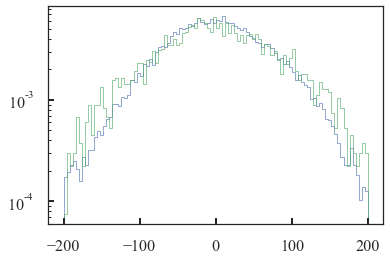

In [284]:
fltr = (data['Z']<-0.4)&(data['Z']>-0.6)&(data['vphi_err']<5.)&(alap['alpha_fe']>0.2)
plt.hist(data['vR'][fltr],range=[-200.,200.],bins=100,histtype='step',normed=True);
fltr = (data['Z']<-0.8)&(data['Z']>-1.)&(data['vphi_err']<5.)&(alap['alpha_fe']>0.2)
plt.hist(data['vR'][fltr],range=[-200.,200.],bins=100,histtype='step',normed=True);
plt.semilogy()

[]

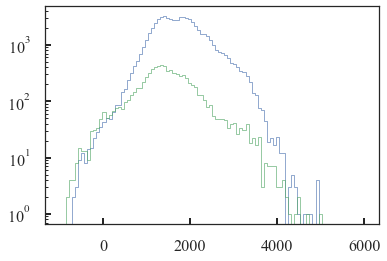

In [287]:
fltr = (alap['fe_h']<-0.4)&(alap['fe_h']>-0.6)&(data['vphi_err']<5.)&(alap['alpha_fe']>0.1)
plt.hist(data['Lz'][fltr],range=[-1000.,6000.],bins=100,histtype='step');
fltr = (alap['fe_h']<-0.8)&(alap['fe_h']>-1.)&(data['vphi_err']<5.)&(alap['alpha_fe']>0.1)
plt.hist(data['Lz'][fltr],range=[-1000.,6000.],bins=100,histtype='step');
plt.semilogy()

[]

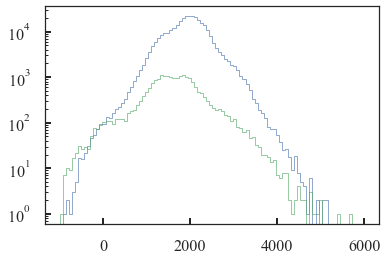

In [305]:
fltr = (data['Z']<-0.4)&(data['Z']>-0.6)&(data['vphi_err']<5.)#&(alap['alpha_fe']>0.2)
plt.hist(data['Lz'][fltr],range=[-1000.,6000.],bins=100,histtype='step');
fltr = (data['Z']<-0.8)&(data['Z']>-1.)&(data['vphi_err']<5.)#&(alap['alpha_fe']>0.2)
plt.hist(data['Lz'][fltr],range=[-1000.,6000.],bins=100,histtype='step');
plt.semilogy()

(array([2., 0., 1., 0., 6., 3., 6., 0., 1., 2.]),
 array([-24.08599221, -22.13619546, -20.1863987 , -18.23660195,
        -16.28680519, -14.33700844, -12.38721168, -10.43741493,
         -8.48761817,  -6.53782142,  -4.58802467]),
 <a list of 10 Patch objects>)

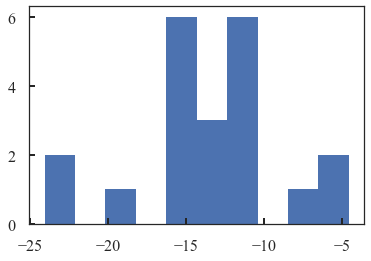

In [320]:
fltr = (data['Z']<0.2)&(data['Z']>-0.)&(data['vphi_err']<15.)&(data['s']<2.)&(data['Z_err']<0.15)&(data['survey']!='LAMOST')&(data['vphi']<0.)&(data['vphi']>-30.)
plt.hist(data['vphi'][fltr])

[]

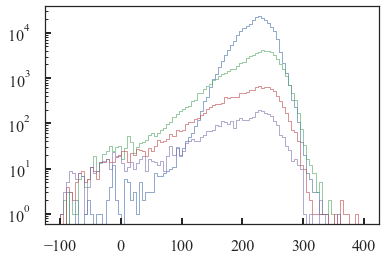

In [319]:
# fltr = (data['Z']<0.4)&(data['Z']>-0.)&(data['vphi_err']<15.)&(data['s']<2.)&(data['Z_err']<0.05)
# plt.hist(data['vphi'][fltr],range=[-100.,400.],bins=100,histtype='step');
fltr = (data['Z']<0.2)&(data['Z']>-0.)&(data['vphi_err']<15.)&(data['s']<2.)&(data['Z_err']<0.15)&(data['survey']!='LAMOST')
plt.hist(data['vphi'][fltr],range=[-100.,400.],bins=100,histtype='step');
fltr = (data['Z']<-0.4)&(data['Z']>-0.6)&(data['vphi_err']<15.)&(data['s']<2.)&(data['Z_err']<0.15)&(data['survey']!='LAMOST')
plt.hist(data['vphi'][fltr],range=[-100.,400.],bins=100,histtype='step');
fltr = (data['Z']<-0.6)&(data['Z']>-0.8)&(data['vphi_err']<15.)&(data['s']<2.)&(data['Z_err']<0.15)&(data['survey']!='LAMOST')
plt.hist(data['vphi'][fltr],range=[-100.,400.],bins=100,histtype='step');
fltr = (data['Z']<-0.8)&(data['Z']>-1.)&(data['vphi_err']<15.)&(data['s']<2.)&(data['Z_err']<0.15)&(data['survey']!='LAMOST')
plt.hist(data['vphi'][fltr],range=[-100.,400.],bins=100,histtype='step');
plt.semilogy()

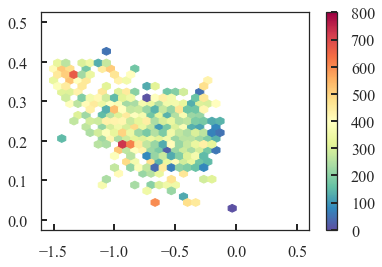

In [264]:
plt.hexbin(alap['fe_h'][fltr2],alap['alpha_fe'][fltr2],
           extent=[-1.5,0.5,-0.,.5],C=data['Lz'][fltr2],
           cmap=plt.cm.Spectral_r,vmin=0.,vmax=800.,gridsize=30,mincnt=2,
           reduce_C_function=np.nanstd);
plt.colorbar()

(-10.0, 10.0)

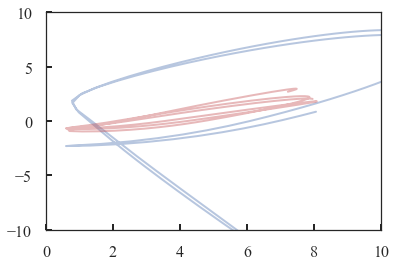

In [304]:
fltr = (data['Z']<-0.4)&(data['Z']>-0.6)&(data['vphi_err']<5.)&(np.abs(data['vphi'])<50.)

pp = np.random.randint(np.count_nonzero(fltr),size=1)
for p in pp:
    initT=np.copy(init_conditions[fltr][p])
    XX = integrate(initT,frac=0.01,totalTfrac=2.)
    plt.plot(np.sqrt(XX[0].T[0]**2+XX[0].T[1]**2),XX[0].T[2],lw=2,color=sns.color_palette()[0],alpha=0.4)

fltr2 = (data['Z']<-0.6)&(data['Z']>-0.8)&(data['vphi_err']<5.)&(np.abs(data['vphi'])<50.)

pp = np.random.randint(np.count_nonzero(fltr2),size=1)
for p in pp:
    initT=np.copy(init_conditions[fltr2][p])
    XX = integrate(initT,frac=0.01,totalTfrac=2.)
    plt.plot(np.sqrt(XX[0].T[0]**2+XX[0].T[1]**2),XX[0].T[2],lw=2,color=sns.color_palette()[2],alpha=0.4)

plt.xlim(0.,10.)
plt.ylim(-10.,10.)

In [53]:
def fn(X):
    return stats(integrate(X,10.,frac=0.01)[0])

import multiprocessing
pool = multiprocessing.Pool(60)
p = pool.map(fn,init_conditions)

In [54]:
np.shape(p)

(4906746, 7)

In [55]:
df = pd.DataFrame(p,
                  columns=['pericentre','apocentre','eccentricity',
                           'pericentre_polar','apocentre_polar','eccentricity_polar',
                           'zmax'])

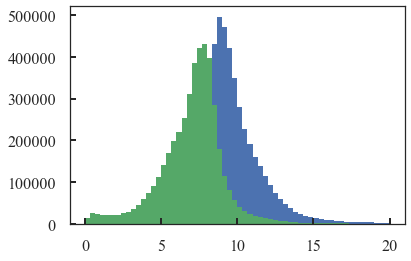

In [60]:
plt.hist(df['apocentre'],range=[0.,20.],bins=60);
plt.hist(df['pericentre'],range=[0.,20.],bins=60);

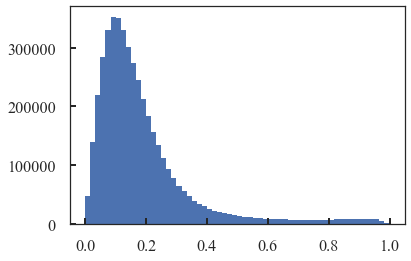

In [61]:
plt.hist(df['eccentricity'],range=[0.,1.],bins=60);

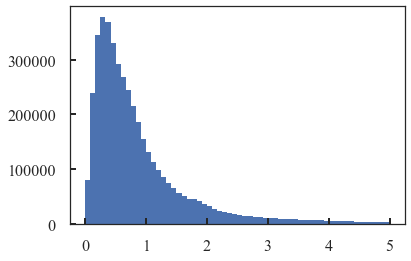

In [64]:
plt.hist(df['zmax'],range=[0.,5.],bins=60);

In [70]:
df['source_id']=data['source_id']
df.to_hdf('/data/jls/GaiaDR2/spectro/orbital_parameters.hdf5',
          'orbital_parameters')

In [71]:
ff = pd.read_hdf('/data/jls/GaiaDR2/spectro/orbital_parameters.hdf5')

In [78]:
np.count_nonzero(ff.source_id<0)

14019

In [80]:
from astropy.table import Table
tbl = Table.from_pandas(ff)
tbl.write('/data/jls/GaiaDR2/spectro/orbital_parameters.hdf5',format='hdf5',
          path='orbital_parameters',overwrite=True)


/home/jls/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [81]:
tbl

pericentre,apocentre,eccentricity,pericentre_polar,apocentre_polar,eccentricity_polar,zmax,source_id
float64,float64,float64,float64,float64,float64,float64,int64
--,--,--,--,--,--,--,3938040468434594304
6.457388301532866,10.734275307455384,0.24877679689395793,6.456747134438129,10.733836948659325,0.2488042170961847,0.18265862434040236,431594980053422720
8.110304716404821,9.320448033395149,0.06942576344009095,8.105357947675378,9.318752784307145,0.06963883869290051,0.3746767576986452,420936967163609728
5.351352588266526,9.366481069721262,0.27280702953695984,5.350623102450045,9.365950606443636,0.2728439094194191,0.19019978722623246,2771993642553377280
7.878076836273581,10.78483724081168,0.155750618179563,7.876652748128626,10.784289299978324,0.15581402827113233,0.23178469521599682,422737314373993984
10.830498983921942,11.776130818514387,0.041829845618586374,10.828069131686437,11.775590555088606,0.04191893863791201,0.27533326985984474,422775384964691328
4.378668172551151,8.327667857932262,0.31078980407154166,4.3704281278290456,8.318485832957684,0.31114228667083293,0.6384945700430776,2341866690928009216
5.456058280919488,11.462489955635265,0.35502051303303256,5.437771798405607,11.461445693147603,0.3564469122758393,1.3303622392164134,2772024119641314560
6.602290869626885,10.746502454811894,0.2388760709568872,6.601120689460873,10.739775706847256,0.2386644221153124,0.46099188930400753,429530195985183744


## Find energy

In [322]:
from astropy.table import Table
tbl = Table.read('/data/jls/GaiaDR2/spectro/orbital_parameters.hdf5')

/home/jls/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [329]:
pot=aa_py.GalPot('../../../code/Torus/pot/PJM16_best.Tpot')
energy=np.array([map(lambda x:pot.energy(x),init_conditions)])

In [332]:
tbl['energy']=energy.flatten()

In [333]:
tbl.write('/data/jls/GaiaDR2/spectro/orbital_parameters.hdf5',format='hdf5',
          path='orbital_parameters',overwrite=True)